In [2]:
import pandas as pd
import numpy as np

# define the name of the csv file you want to read in
accounts = './data/accounts.csv'
playbacks = './data/playbacks.csv'
subscriptions = './data/subscriptions.csv'

# EDA part

In [3]:
import sql_functions as sf
schema = 'capstone_filmingo'

# One Time Rentals per account

In [59]:
sf.get_dataframe(f'SELECT account_key as account, onetime_rental_count as otr FROM {schema}.accounts ORDER BY otr DESC').head(10)

,account,otr
0,aa298339b2c79e93e2871ecdf517df6c993ae3c557a519...,106
1,42b776449a9d166d06a7f34eda552304d88179fd120243...,79
2,16b4d103c282b05e48cc0c7f6e61ec38849e274cd7113e...,65
3,cef71c8f362d72769a1d6efbcb6893fc2870ca432580f3...,61
4,ee09fd72149823ebdaf43c9dcc26a56ee9df0e65a5f7ff...,57
5,c4bfd142de9f35ca9693f74546f41c1d3b08f8f0935e3a...,53
6,04625fa886f8a78d7448906288532213a7d2fd944e4ddc...,52
7,fe7ad6aadb0c162176d44e930ae89a11bccccc6dfc1d0a...,52
8,67259cdf01114462ed9edcb6ecb645ed90babf871ef156...,51
9,89bdbeafc7bf9171186e733e54209babecbb0586def022...,51


In [117]:
# Sum of accounts -> 22.154
display(sf.get_dataframe(f'SELECT account_key FROM {schema}.accounts').count())

# Sum of otr -> 28.810
display(sf.get_dataframe(f'SELECT SUM(onetime_rental_count) FROM {schema}.accounts'))

# Sum of accounts with otr -> 10.242
display(sf.get_dataframe(f'SELECT account_key FROM {schema}.accounts WHERE onetime_rental_count > 0').count())

# Sum of accounts without otr -> 11.912
display(sf.get_dataframe(f'SELECT account_key FROM {schema}.accounts WHERE onetime_rental_count = 0').count())

# Accounts without sub and without otr -> 5040


account_key    22154
dtype: int64

,sum
0,28810.0


account_key    10242
dtype: int64

account_key    11912
dtype: int64

<AxesSubplot:title={'center':'One Time Rentals per account'}, ylabel='Frequency'>

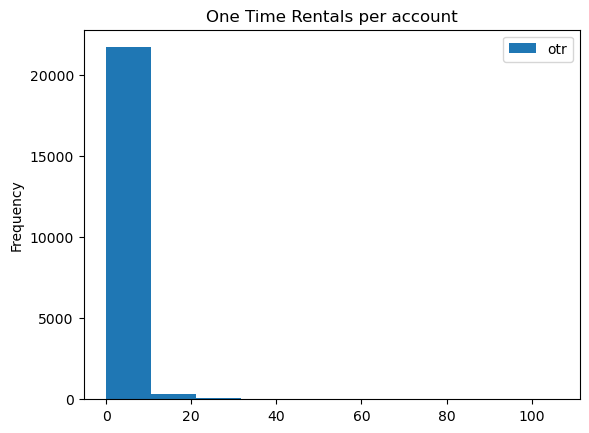

In [60]:
sf.get_dataframe(f'SELECT account_key as account, onetime_rental_count as otr FROM {schema}.accounts ORDER BY otr DESC').plot(kind="hist", title="One Time Rentals per account")

<AxesSubplot:title={'center':'One Time Rentals per account'}>

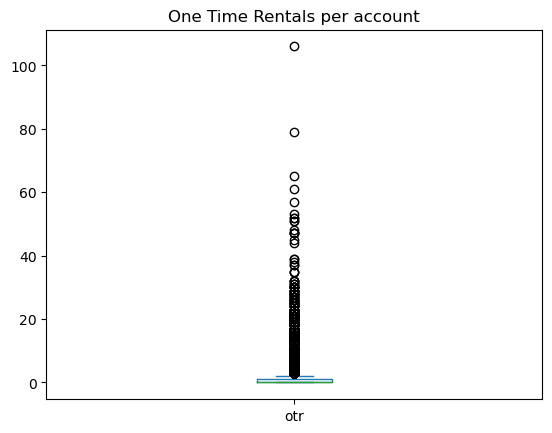

In [47]:
sf.get_dataframe(f'SELECT account_key as account, onetime_rental_count as otr FROM {schema}.accounts ORDER BY otr DESC').plot(kind="box", title="One Time Rentals per account")

<AxesSubplot:title={'center':'One Time Rentals per account'}>

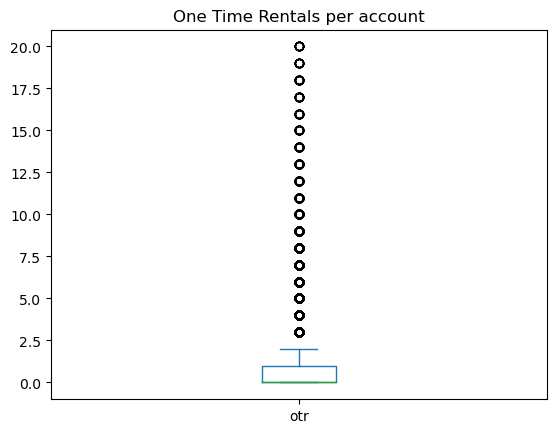

In [57]:
# otr =< 20
sf.get_dataframe(f'SELECT account_key as account, onetime_rental_count as otr FROM {schema}.accounts WHERE onetime_rental_count <= 20 ORDER BY otr DESC').plot(kind="box", title="One Time Rentals per account")

<AxesSubplot:title={'center':'One Time Rentals per account'}, ylabel='Frequency'>

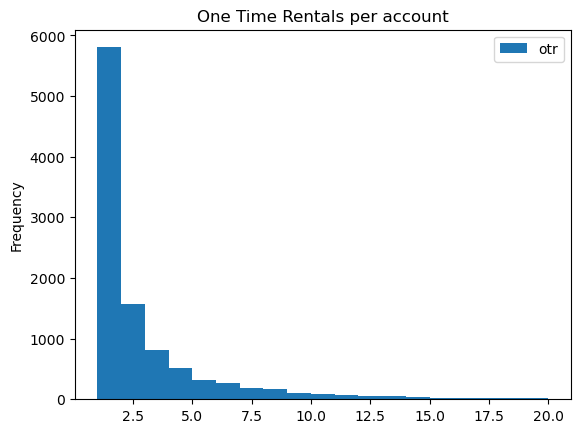

In [20]:
sf.get_dataframe(f'SELECT account_key as account, onetime_rental_count as otr FROM {schema}.accounts WHERE onetime_rental_count > 0 and onetime_rental_count <= 20 ORDER BY otr DESC').plot(kind="hist", bins=19, title="One Time Rentals per account")

# Subscriptions per account

In [37]:
sf.get_dataframe(f' SELECT account_key as account, subscription_count FROM {schema}.accounts WHERE (onetime_rental_count > 0 or subscription_count > 0)').describe()

,subscription_count
count,17135.000000
mean,0.714152
std,0.882561
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,13.000000


In [42]:
sf.get_dataframe(f' SELECT * FROM {schema}.accounts WHERE subscription_count > 4').count()

account_key             80
city_original           80
language                80
country_code            80
email_hash              80
onetime_rental_count    80
subscription_count      80
registration_date       80
lastlogin_date          80
postal_code_clean       80
city_clean              80
state                   80
language_code           76
country_name            80
region                  80
sub_region              80
voucher_used            10
dtype: int64

<AxesSubplot:title={'center':'Subscriptions per account'}, ylabel='Frequency'>

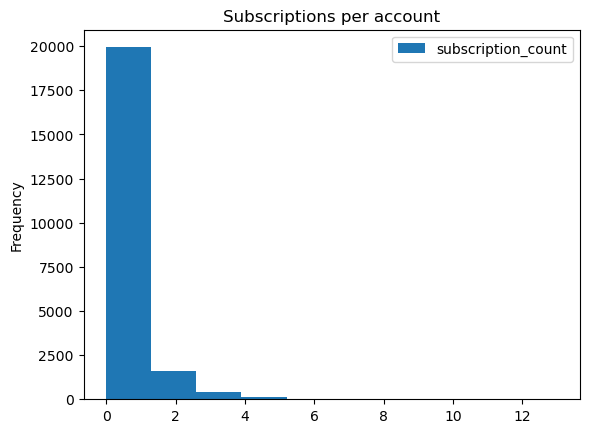

In [102]:
f.get_dataframe(f' SELECT account_key as account, subscription_count FROM {schema}.accounts ORDER BY subscription_count DESC').plot(kind="hist", title="Subscriptions per account")

<AxesSubplot:title={'center':'Subscriptions per account'}>

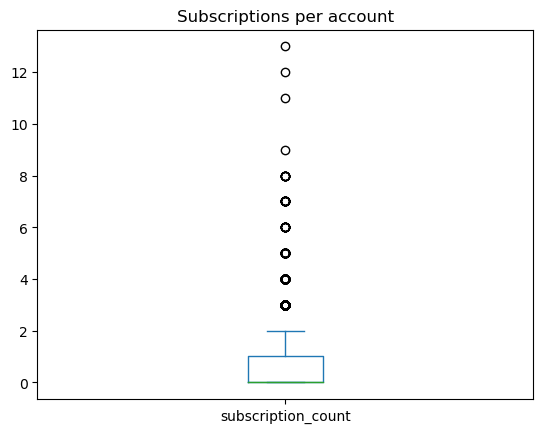

In [65]:
sf.get_dataframe(f' SELECT account_key as account, subscription_count FROM {schema}.accounts ORDER BY subscription_count DESC').plot(kind="box", title="Subscriptions per account")

<AxesSubplot:title={'center':'Subscriptions per account'}, ylabel='Frequency'>

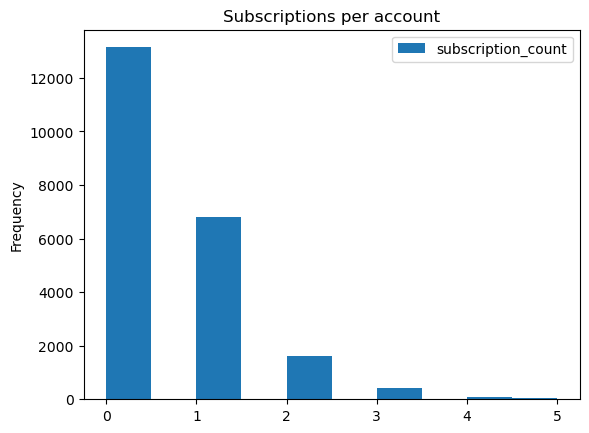

In [64]:
sf.get_dataframe(f' SELECT account_key as account, subscription_count FROM {schema}.accounts WHERE subscription_count <= 5 ORDER BY subscription_count DESC').plot(kind="hist", title="Subscriptions per account")

In [67]:
sf.get_dataframe(f'(SELECT COUNT(*) as accounts, subscription_count FROM {schema}.accounts WHERE subscription_count <= 5 GROUP BY subscription_count ORDER BY subscription_count)')

,accounts,subscription_count
0,13234,0
1,6812,1
2,1625,2
3,422,3
4,102,4
5,36,5


# OTR of accounts without subscription

<AxesSubplot:title={'center':'One Time Rentals of accounts without sub'}, ylabel='Frequency'>

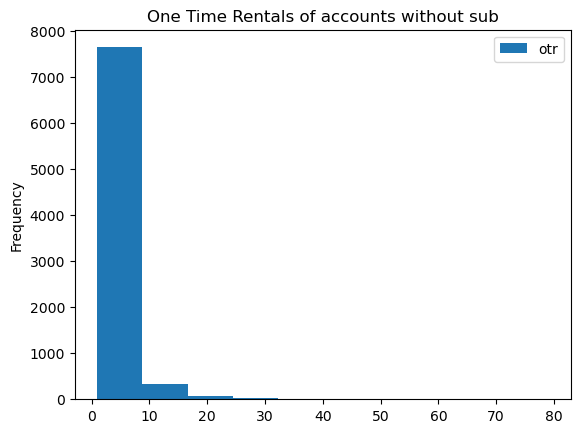

In [21]:
sf.get_dataframe(f'SELECT account_key as account, onetime_rental_count as otr FROM {schema}.accounts WHERE onetime_rental_count > 0 and subscription_count = 0 ORDER BY otr DESC').plot(kind="hist", bins= title="One Time Rentals of accounts without sub")

<AxesSubplot:title={'center':'One Time Rentals of accounts without sub'}, ylabel='Frequency'>

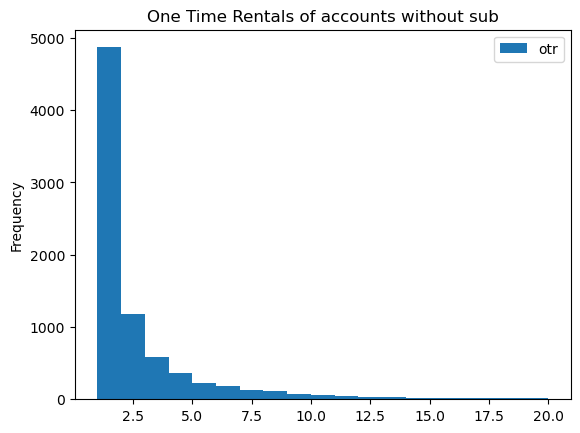

In [24]:
sf.get_dataframe(f'SELECT account_key as account, onetime_rental_count as otr FROM {schema}.accounts WHERE (onetime_rental_count > 0 and subscription_count = 0 and onetime_rental_count <= 20) ORDER BY otr DESC').plot(kind="hist", bins=19, title="One Time Rentals of accounts without sub")

# Accounts without sub AND without otr

In [26]:
nosub_nootr_df = sf.get_dataframe(f'SELECT * FROM {schema}.accounts WHERE (subscription_count = 0 AND onetime_rental_count =0)')
nosub_nootr_df.account_key.count()

5040

In [29]:
nosub_nootr_df.count()

#4960 values voucher_used NaN

account_key             5040
city_original           5033
language                5040
country_code            5039
email_hash              5040
onetime_rental_count    5040
subscription_count      5040
postal_code_clean       5040
city_clean              3889
state                   3889
language_code           2984
country_name            5038
region                  5038
sub_region              5038
voucher_used              85
dtype: int64

# Total playbacks per year

In [68]:
sf.get_dataframe(f'SELECT EXTRACT(year FROM date_start) as year, account_key as account, count(*) as playbacks FROM {schema}.playbacks GROUP BY account, EXTRACT(year FROM date_start)').head(15)

,year,account,playbacks
0,2020.0,03e5c7a5b5427f67abb449ce197d2b412d923c7dab1a3a...,2
1,2021.0,6b2d34bf34bd56c8cf87f10492cebbf88b0d0a2f8e35d8...,3
2,2021.0,fc80bc77fae4e313b95eba3c416b5be51693f824e8cda5...,1
3,2021.0,b460eefee28f1f9eeccf35d6686ab7ec191542907f914a...,3
4,2021.0,742db35e6244d780b03c2492490ac92059246329fa1adb...,1
5,2020.0,49af49f5cdbc08cca082318f55a01020b5bf8e71bfed7e...,1
6,2020.0,f94e5fb65026ecf3d89ffeaa5f34688c7c11bc9b22caf3...,1
7,2021.0,dfa6ac65dba5f57a3d92ecc1fa97e8ed30c1c68fe32d2a...,3
8,2021.0,4db4bd95950c585b92f5b166ef7a9e66c6c49f0414fbaf...,2
9,2020.0,80bd0e507b72ecb80c096c7f6fb47e96031366bcb533a0...,1


In [32]:
sf.get_dataframe(f"SELECT account_key as account, count(*) as playbacks FROM {schema}.playbacks WHERE date_start BETWEEN '01-10-2020' and '01-10-2021' GROUP BY account").head(15)

,account,playbacks
0,de49489fa053e641358832f3828c51d4caacd4b5bce4fa...,1
1,408242031892d461f1f3c487e5c8ccc9b3f89b7ed66a6f...,1
2,e3115a13e7669baba96076f8d1a2b164334aea99ef1819...,1
3,9d417f54b0e5d43b32614c1e049abb751aafc1c5e0ac77...,3
4,484ab44828d615bef381035ff9501bb5f4ea97343ee35d...,5
5,5e40fb03ed1bbcf37703c64e106100735f5df7a40f1c44...,3
6,050917ccf8145b58bba593198705ff7798e4b21baee029...,2
7,c8f1275b3efabce9b339b3dcc31323a1a5e8c8af820eaa...,1
8,725e1a6527ab0c731c3097da3439f1522b56353190f87b...,14
9,e5f9d393069001ac1ea9fbc764a391502e247a903fd7c7...,2


In [70]:
sf.get_dataframe(f"SELECT COUNT(playbacks) FROM {schema}.playbacks WHERE date_start BETWEEN '01-10-2020' and '01-10-2021'").head(15)
sf.get_dataframe(f"SELECT COUNT(playbacks) FROM {schema}.playbacks WHERE date_start BETWEEN '01-10-2021' and '01-10-2022'").head(15)

,count
0,96599


In [156]:
sf.get_dataframe(f'SELECT EXTRACT(year FROM date_start) as year, count(*) as playbacks FROM {schema}.playbacks GROUP BY EXTRACT(year FROM date_start) ORDER BY year').head(15)
#TODO average per month per year
#IDEA to have two time periods (October 20-21-22)

,year,playbacks
0,2020.0,18928
1,2021.0,80727
2,2022.0,39914


# Playbacks per device

In [107]:
sf.get_dataframe(f' SELECT device, COUNT(*) as playbacks FROM {schema}.playbacks GROUP BY device').head()

,device,playbacks
0,desktop,116769
1,mobile,22800


In [93]:
sf.get_dataframe(f' SELECT app_user, COUNT(*) FROM {schema}.playbacks GROUP BY app_user').head()

,app_user,count
0,no,126396
1,yes,13173


In [94]:
sf.get_dataframe(f' SELECT device, app_user, COUNT(*) FROM {schema}.playbacks GROUP BY device, app_user').head()

#TODO rethink the categorizat names (What about tv app user)

,device,app_user,count
0,desktop,no,116769
1,mobile,no,9627
2,mobile,yes,13173


In [ ]:
sf.get_dataframe(f" SELECT user_agent, COUNT(*) FROM {schema}.playbacks WHERE user_agent LIKE '%%iPhone%%'").head()


# Playbacks per subscription type (per month)

In [133]:
sf.get_dataframe(f' SELECT subscription_type, COUNT(subscriptions.account_key) playbacks FROM {schema}.playbacks INNER JOIN {schema}.subscriptions on {schema}.playbacks.subscription_key = {schema}.subscriptions.subscription_key GROUP BY subscription_type').head()


,subscription_type,playbacks
0,BASIC,47172
1,PATRON,40675
2,STANDARD,47701


In [ ]:
sf.get_dataframe(f' SELECT subscription_type, COUNT(subscriptions.account_key) playbacks FROM {schema}.playbacks INNER JOIN {schema}.subscriptions on {schema}.playbacks.subscription_key = {schema}.subscriptions.subscription_key GROUP BY subscription_type').head()


In [33]:
#sf.get_dataframe(f' SELECT device, COUNT(*) as playbacks FROM {schema}.playbacks GROUP BY device').head()
sf.get_dataframe(f' SELECT subscription_type, COUNT(*) / COUNT(DISTINCT playbacks.account_key) as average_playbacks FROM {schema}.playbacks INNER JOIN {schema}.subscriptions on {schema}.playbacks.subscription_key = {schema}.subscriptions.subscription_key GROUP BY subscription_type').head()
#TODO average per subscription per type -> playbacks/count(subscription) -> view per subscription

,subscription_type,average_playbacks
0,BASIC,9
1,PATRON,44
2,STANDARD,17


# Playbacks per month/weekday 

In [32]:
sf.get_dataframe(f' SELECT EXTRACT(year FROM date_start) as year, subscription_type, COUNT(*) / COUNT(DISTINCT playbacks.account_key) as playbacks FROM {schema}.playbacks INNER JOIN {schema}.subscriptions on {schema}.playbacks.subscription_key = {schema}.subscriptions.subscription_key GROUP BY subscription_type, year ORDER BY subscription_type').head(30)
#sf.get_dataframe(f' SELECT EXTRACT(year FROM date_start) as year, subscription_type, COUNT(*) as playbacks FROM {schema}.playbacks INNER JOIN {schema}.subscriptions on {schema}.playbacks.subscription_key = {schema}.subscriptions.subscription_key GROUP BY subscription_type, year ORDER BY subscription_type').head(30)
#TODO per month and weekday
#TODO transform year into timeframe -> WHERE DATE BETWEEN

,year,subscription_type,playbacks
0,2020.0,BASIC,2
1,2021.0,BASIC,7
2,2022.0,BASIC,6
3,2020.0,PATRON,7
4,2021.0,PATRON,29
5,2022.0,PATRON,22
6,2020.0,STANDARD,4
7,2021.0,STANDARD,14
8,2022.0,STANDARD,11


In [87]:
sf.get_dataframe(f" SELECT EXTRACT(year FROM date_start) as year, EXTRACT(month FROM date_start) as month, subscription_type, COUNT(*) / COUNT(DISTINCT playbacks.account_key)::float as playbacks FROM {schema}.playbacks INNER JOIN {schema}.subscriptions on {schema}.playbacks.subscription_key = {schema}.subscriptions.subscription_key WHERE subscription_type = 'BASIC' GROUP BY subscription_type, year, month ORDER BY subscription_type, year, month").head(30)
sf.get_dataframe(f" SELECT EXTRACT(year FROM date_start) as year, EXTRACT(month FROM date_start) as month, subscription_type, COUNT(*) / COUNT(DISTINCT playbacks.account_key)::float as playbacks FROM {schema}.playbacks INNER JOIN {schema}.subscriptions on {schema}.playbacks.subscription_key = {schema}.subscriptions.subscription_key WHERE subscription_type = 'STANDARD' GROUP BY subscription_type, year, month ORDER BY subscription_type, year, month").head(30)
sf.get_dataframe(f" SELECT EXTRACT(year FROM date_start) as year, EXTRACT(month FROM date_start) as month, subscription_type, COUNT(*) / COUNT(DISTINCT playbacks.account_key)::float as playbacks FROM {schema}.playbacks INNER JOIN {schema}.subscriptions on {schema}.playbacks.subscription_key = {schema}.subscriptions.subscription_key WHERE subscription_type = 'PATRON' GROUP BY subscription_type, year, month ORDER BY subscription_type, year, month").head(30)

,year,month,subscription_type,playbacks
0,2020.0,11.0,PATRON,4.498592
1,2020.0,12.0,PATRON,5.164835
2,2021.0,1.0,PATRON,5.566148
3,2021.0,2.0,PATRON,4.958984
4,2021.0,3.0,PATRON,5.001927
5,2021.0,4.0,PATRON,5.069767
6,2021.0,5.0,PATRON,5.262222
7,2021.0,6.0,PATRON,4.190751
8,2021.0,7.0,PATRON,3.958564
9,2021.0,8.0,PATRON,3.900277


In [88]:
#LIMITS
sf.get_dataframe(f" SELECT EXTRACT(year FROM date_start) as year, EXTRACT(month FROM date_start) as month, subscription_type, COUNT(*) / COUNT(DISTINCT playbacks.account_key)::float as playbacks FROM {schema}.playbacks INNER JOIN {schema}.subscriptions on {schema}.playbacks.subscription_key = {schema}.subscriptions.subscription_key WHERE subscription_type = 'BASIC' GROUP BY subscription_type, year, month ORDER BY subscription_type, year, month").head(30)

,year,month,subscription_type,playbacks
0,2020.0,11.0,BASIC,1.465622
1,2020.0,12.0,BASIC,1.624005
2,2021.0,1.0,BASIC,1.712924
3,2021.0,2.0,BASIC,1.595831
4,2021.0,3.0,BASIC,1.691573
5,2021.0,4.0,BASIC,1.653868
6,2021.0,5.0,BASIC,1.694462
7,2021.0,6.0,BASIC,1.574888
8,2021.0,7.0,BASIC,1.658429
9,2021.0,8.0,BASIC,1.636447


In [143]:
sf.get_dataframe(f"SELECT EXTRACT(year FROM date_start) as year, EXTRACT(month FROM date_start) as month, playbacks.account_key as account, count(*) as views FROM {schema}.playbacks INNER JOIN {schema}.subscriptions on {schema}.playbacks.subscription_key = {schema}.subscriptions.subscription_key WHERE subscription_type = 'BASIC' GROUP BY account, year, month HAVING COUNT(*) = 2 ORDER BY year, month").nunique()
sf.get_dataframe(f"SELECT EXTRACT(year FROM date_start) as year, EXTRACT(month FROM date_start) as month, playbacks.account_key as account, count(*) as views FROM {schema}.playbacks INNER JOIN {schema}.subscriptions on {schema}.playbacks.subscription_key = {schema}.subscriptions.subscription_key WHERE subscription_type = 'STANDARD' GROUP BY account, year, month HAVING COUNT(*) = 5 ORDER BY year, month").nunique()
sf.get_dataframe(f"SELECT EXTRACT(year FROM date_start) as year, EXTRACT(month FROM date_start) as month, playbacks.account_key as account, count(*) as views FROM {schema}.playbacks INNER JOIN {schema}.subscriptions on {schema}.playbacks.subscription_key = {schema}.subscriptions.subscription_key WHERE subscription_type = 'PATRON' GROUP BY account, year, month HAVING COUNT(*) = 5 ORDER BY year, month").nunique()

year         3
month       12
account    382
views        1
dtype: int64

In [139]:
sf.get_dataframe(f"SELECT EXTRACT(year FROM date_start) as year, EXTRACT(month FROM date_start) as month, playbacks.account_key as account, count(*) as views FROM {schema}.playbacks INNER JOIN {schema}.subscriptions on {schema}.playbacks.subscription_key = {schema}.subscriptions.subscription_key WHERE subscription_type = 'BASIC' GROUP BY account, year, month ORDER BY year, month").nunique()
sf.get_dataframe(f"SELECT EXTRACT(year FROM date_start) as year, EXTRACT(month FROM date_start) as month, playbacks.account_key as account, count(*) as views FROM {schema}.playbacks INNER JOIN {schema}.subscriptions on {schema}.playbacks.subscription_key = {schema}.subscriptions.subscription_key WHERE subscription_type = 'STANDARD' GROUP BY account, year, month ORDER BY year, month").nunique()
#sf.get_dataframe(f"SELECT EXTRACT(year FROM date_start) as year, EXTRACT(month FROM date_start) as month, playbacks.account_key as account, count(*) as views FROM {schema}.playbacks INNER JOIN {schema}.subscriptions on {schema}.playbacks.subscription_key = {schema}.subscriptions.subscription_key WHERE subscription_type = 'PATRON' GROUP BY account, year, month ORDER BY year, month").nunique()

year          3
month        12
account    2762
views        16
dtype: int64

# Playbacks per account (per month)

In [58]:
sf.get_dataframe(f" SELECT EXTRACT(year FROM date_start) as year, EXTRACT(month FROM date_start) as month, playbacks.account_key as account, COUNT(*) as playbacks FROM {schema}.playbacks INNER JOIN {schema}.accounts on {schema}.playbacks.account_key = {schema}.accounts.account_key GROUP BY playbacks.account_key, year, month ORDER BY year, month").head()
#TODO average per month per account
#TODO COUNT of playbacks per subscription_type
#TODO playback as x-axis bar chart

,year,month,account,playbacks
0,2020.0,11.0,4399dadc2566bcf0945794343e9a8dde1abf87ccca21df...,1
1,2020.0,11.0,603e73a665d3b316ba9fa131986ba028516946c5dad708...,9
2,2020.0,11.0,75f3ce89e4bfe4ab3199a415aab1eed72b4860bd4409d1...,1
3,2020.0,11.0,2a5fcdef83e4fc19191450606307310adaa9c06fcdfb61...,1
4,2020.0,11.0,05eede3a3c8443533a3c2436faece24602c439348b3d3f...,1


# Hours watched per account (per month)

In [170]:
sf.get_dataframe(f' SELECT EXTRACT(year FROM date_start) as year, EXTRACT(month FROM date_start) as month, playbacks.account_key as account, (SUM(playback_time)/60/60) as playback_hours FROM {schema}.playbacks INNER JOIN {schema}.accounts on {schema}.playbacks.account_key = {schema}.accounts.account_key GROUP BY playbacks.account_key, year, month ORDER BY year, month').head(30)
sf.get_dataframe(f' SELECT EXTRACT(year FROM date_start) as year, EXTRACT(month FROM date_start) as month, (SUM(playback_time)/60/60) as playback_hours FROM {schema}.playbacks INNER JOIN {schema}.accounts on {schema}.playbacks.account_key = {schema}.accounts.account_key GROUP BY year, month ORDER BY year, month').mean()
#TODO average per account

year               2021.250000
month                 6.500000
playback_hours    10407.222222
dtype: float64

# Sent movie vouchers
How many movie vouchers are being gifted per month / per subscription type?

In [40]:
sf.get_dataframe(f' SELECT DISTINCT * FROM {schema}.playbacks WHERE device IS NULL')

,playback_ID,subscription_key,account_key,movie_id,date_start,playback_time,user_agent,ip_hash,device,app user
